In [26]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(3333, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [5]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Распределение оттока колиентов')

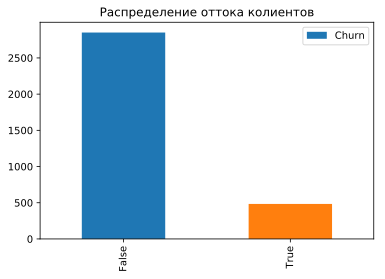

In [7]:
df['Churn'].value_counts().plot(kind='bar', label='Churn')
plt.legend()
plt.title('Распределение оттока колиентов')

In [8]:
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan', 'Area code'], axis=1).corr()

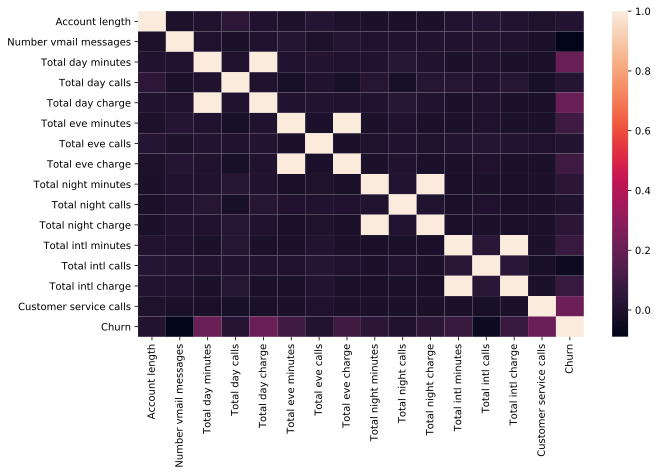

In [11]:
sns.heatmap(corr_matrix);

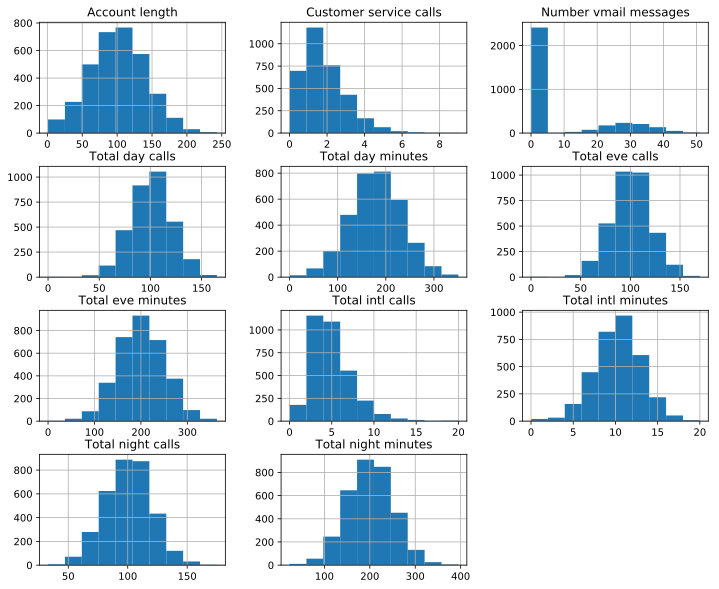

In [16]:
features = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan','Area code',
                                       'Total day charge', 'Total eve charge', 'Total night charge',
                                       'Total intl charge', 'Churn']))
df[features].hist(figsize=(12,10));

In [ ]:
sns.pairplot(df[features + ['Churn']], hue='Churn');

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

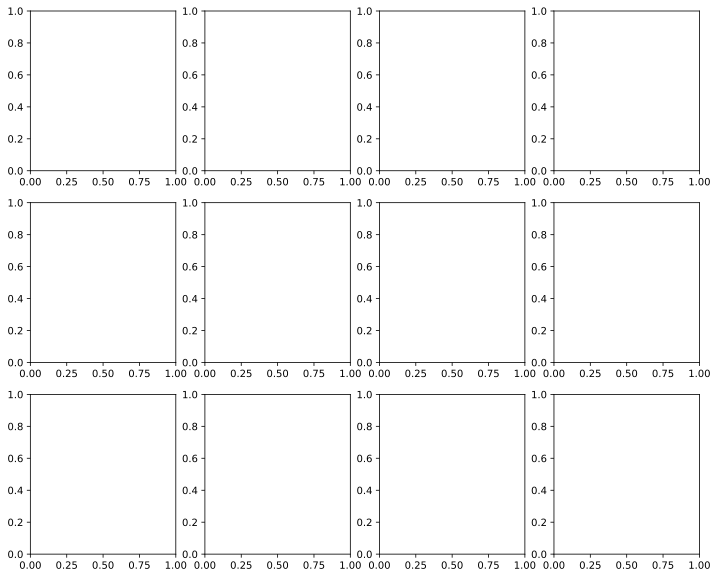

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))

for idx, feat in enumerate(features):
    sns.boxplot(x='Churn', y=feat, data=df, ax=axes[idx / 4, idx % 4])
    axes[idx / 4, idx % 4].legend()
    axes[idx / 4, idx % 4].set_xlabel('Churn')
    axes[idx / 4, idx % 4].set_ylabel(feat);

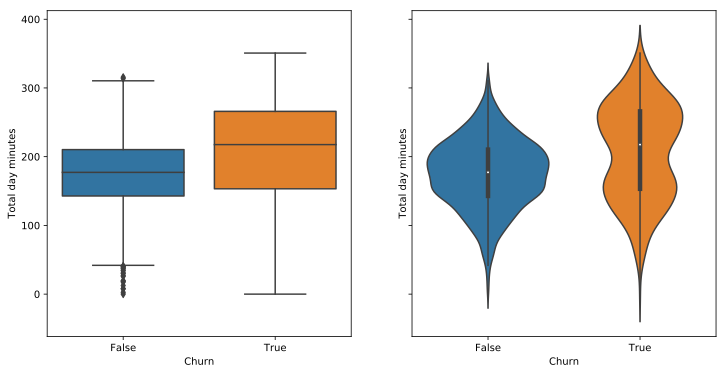

In [19]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

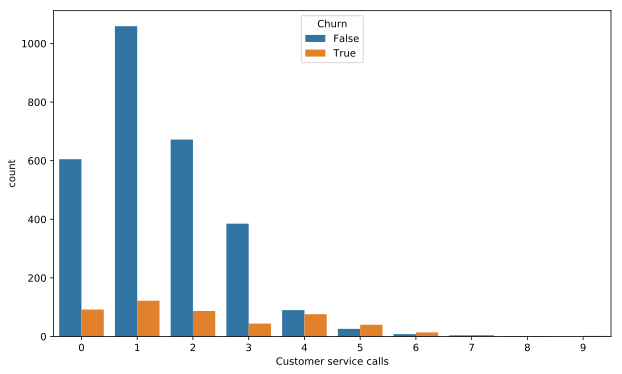

In [20]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

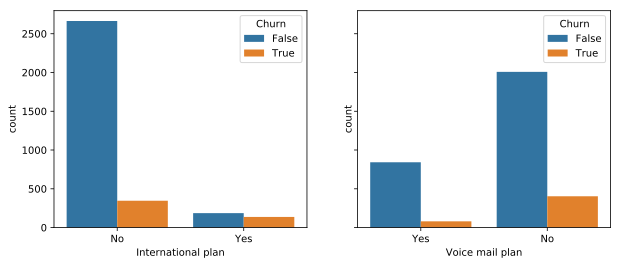

In [24]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

In [27]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


In [28]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [29]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = pd.factorize(X['International plan'])[0]
X['Voice mail plan'] = pd.factorize(X['Voice mail plan'])[0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [30]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 46.6 s, sys: 145 ms, total: 46.7 s
Wall time: 47 s


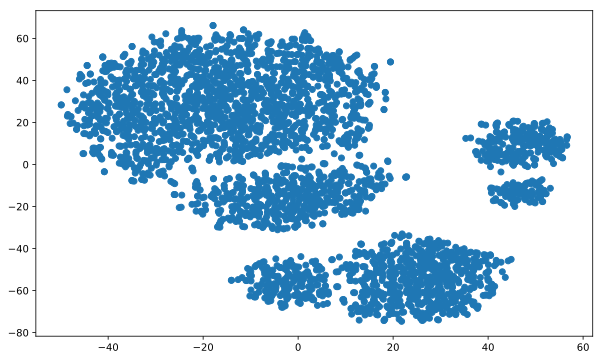

In [31]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

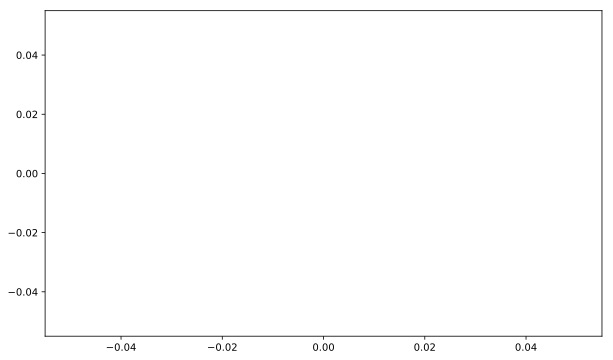

In [32]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Churn'].map({0: 'blue', 1: 'orange'}));

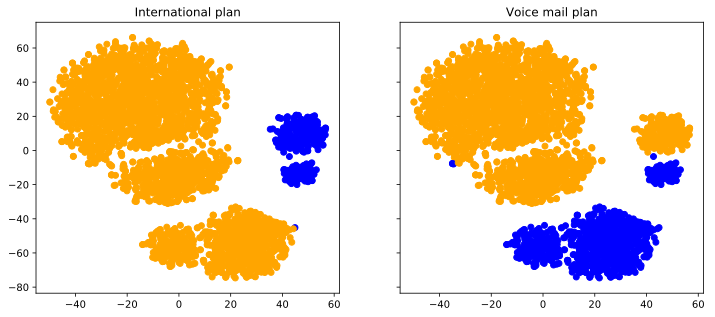

In [36]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

axes[0].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['International plan'].map({'Yes': 'blue', 'No': 'orange'}));
axes[1].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Voice mail plan'].map({'Yes': 'blue', 'No': 'orange'}));
axes[0].set_title('International plan');
axes[1].set_title('Voice mail plan');

## home work

In [37]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('howpop_train.csv')
df.shape

OSError: Initializing from file failed